In [1]:
import pandas as pd
import yfinance as yf
import datetime as datetime


In [3]:
start_date = datetime.datetime(2020,11,3)
end_date = datetime.datetime(2022,11,3)

In [11]:
#df = pd.read_csv("AAPL.csv",parse_dates = True,  index_col = 'Date')
df = pd.DataFrame()
tickers = ['AAPL', "MSFT", "GOOGL", "TSLA"]
for i in tickers:
    data = yf.download(i, start_date, end_date)
    df[i] = data['Close']
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
df.head()

,AAPL,MSFT,GOOGL,TSLA
Date,,,,
2020-11-02,108.769997,202.330002,1624.319946,400.510010
2020-11-03,110.440002,206.429993,1645.660034,423.899994
2020-11-04,114.949997,216.389999,1745.849976,420.980011
2020-11-05,119.029999,223.289993,1762.500000,438.089996
2020-11-06,118.690002,223.720001,1759.729980,429.950012


How to extract data from some middle values?

In [ ]:
df.plot( y = 'Close', title = "Close Price of AAPL");    

# Real time stock analysis using Alpha_vantage

In [13]:
! pip install alpha_vantage

In [21]:
api_key = "9AZA1VG40S03ZRZW" 

In [22]:
from alpha_vantage import timeseries
import time

In [23]:
ts = timeseries.TimeSeries(key = api_key , output_format= 'pandas')
data, metadata = ts.get_intraday(symbol= 'MSFT' , interval= '1min', outputsize= 'full')

In [24]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-04-04 20:00:00,315.37,315.3700,315.07,315.07,10193.0
2022-04-04 19:59:00,315.37,315.3700,315.37,315.37,214.0
2022-04-04 19:56:00,315.20,315.2000,315.20,315.20,257.0
2022-04-04 19:53:00,315.18,315.1801,315.10,315.10,4516.0
2022-04-04 19:50:00,315.18,315.1800,315.18,315.18,3029.0


In [29]:
data['1. open'].max()


315.93

Import the data and find out maximum of close price using functions.

In [60]:
def get_max(data):
    
    return(data.idxmax(),data['Close'].max())


def test_run(symbol):
    
    Close = pd.DataFrame()
    Open = pd.DataFrame()
    High = pd.DataFrame()
    Low = pd.DataFrame()
    for i in symbol:
        data = pd.read_csv(i, parse_dates = True, index_col = 'Date')
        Close["Close"] = data['Close']
        Close["Adj Close"] = data["Adj Close"]
        print(i, get_max(Close))
        Close[['Close', 'Adj Close']].plot(title = i , ylabel = 'Close Prices', figsize = (10,6));
    

AAPL (Close       2022-01-03
Adj Close   2022-01-03
dtype: datetime64[ns], 182.009995)
MSFT (Close       2021-11-19
Adj Close   2021-11-19
dtype: datetime64[ns], 343.109985)
GOOGL (Close       2021-11-18
Adj Close   2021-11-18
dtype: datetime64[ns], 2996.77002)
TSLA (Close       2021-11-04
Adj Close   2021-11-04
dtype: datetime64[ns], 1229.910034)


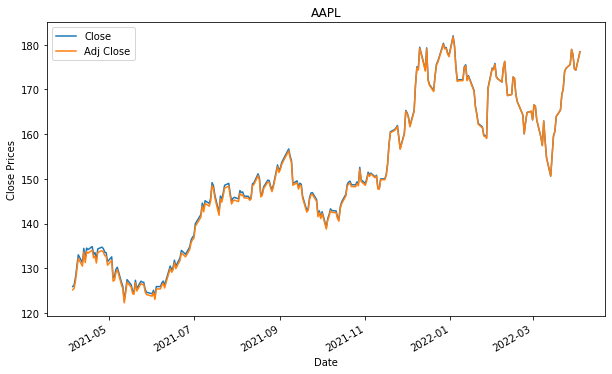

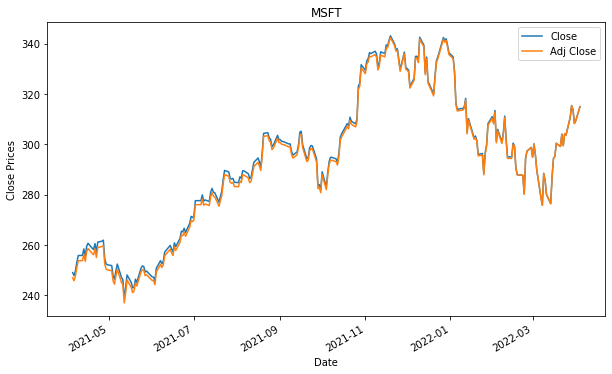

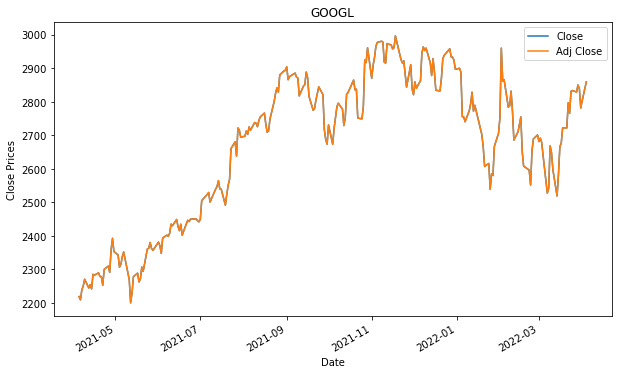

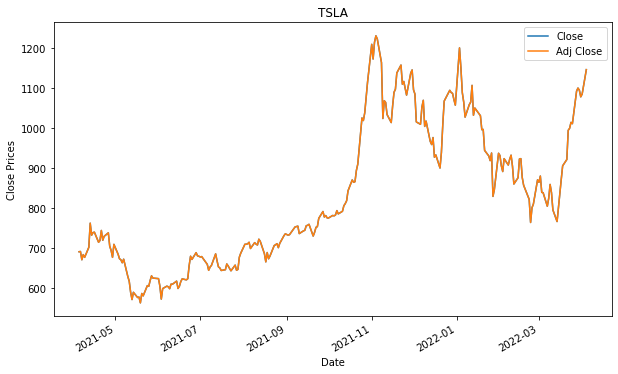

In [61]:
test_run(["AAPL", "MSFT", "GOOGL", "TSLA"])